# Reducing hospital readmissions

## 📖 Background
You work for a consulting company helping a hospital group better understand patient readmissions. The hospital gave you access to ten years of information on patients readmitted to the hospital after being discharged. The doctors want you to assess if initial diagnoses, number of procedures, or other variables could help them better understand the probability of readmission. 

They want to focus follow-up calls and attention on those patients with a higher probability of readmission.

## 💾 The data
You have access to ten years of patient information ([source](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)):

#### Information in the file
- "age" - age bracket of the patient
- "time_in_hospital" - days (from 1 to 14)
- "n_procedures" - number of procedures performed during the hospital stay
- "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
- "n_medications" - number of medications administered during the hospital stay
- "n_outpatient" - number of outpatient visits in the year before a hospital stay
- "n_inpatient" - number of inpatient visits in the year before the hospital stay
- "n_emergency" - number of visits to the emergency room in the year before the hospital stay
- "medical_specialty" - the specialty of the admitting physician
- "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
- "diag_2" - secondary diagnosis
- "diag_3" - additional secondary diagnosis
- "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
- "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
- "change" - whether there was a change in the diabetes medication ('yes' or 'no')
- "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
- "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no') 

***Acknowledgments**: Beata Strack, Jonathan P. DeShazo, Chris Gennings, Juan L. Olmo, Sebastian Ventura, Krzysztof J. Cios, and John N. Clore, "Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records," BioMed Research International, vol. 2014, Article ID 781670, 11 pages, 2014.*

In [52]:
import pandas as pd
df = pd.read_csv('data/hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


## 💪 Competition challenge
Create a report that covers the following:

1. What is the most common primary diagnosis by age group? 
2. Some doctors believe diabetes might play a central role in readmission. Explore the effect of a diabetes diagnosis on readmission rates. 
3. On what groups of patients should the hospital focus their follow-up efforts to better monitor patients with a high probability of readmission?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights. 
- Try to include an **executive summary** of your recommendations at the beginning.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

# Step 1: Data Validation

##  Step 1.1: check shape and presence of null values

In [53]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

1. The dataframe contains 25,000 rows and 77 columns.
2. There are no null values
3. All the columns are of the right dtypes as detailed in the instructions.


## Step 1.2 Understanding data distribution

Let's start by creating a function that takes in all rows and calculates all the initial analysis we need to better understand the data, such as measures of central tendency.

In [54]:
def central_tendency (df):
    #create the necessary columns
    analysis_df =pd.DataFrame(columns = ["count", 'dtype', 'na_values', 'unique', 'mode', 'mean', 'min', '25%', 'median', '75%', 'max', 'skewness', 'kurtosis', 'std'])
    #iterate though the dataframe's columns and calculate the different measures for both numeric and categorical columns
    for col in df:
        if pd.api.types.is_numeric_dtype(df[col]):
            analysis_df.loc[col] = [df[col].count(), df[col].dtype, df[col].isna().sum(), df[col].nunique(), df[col].mode().values[0], round(df[col].mean(), 3), df[col].min(), df[col].quantile(0.25), 
                                df[col].median(), df[col].quantile(0.75), df[col].max(), df[col].skew(), df[col].kurtosis(), df[col].std()]
        else:
            analysis_df.loc[col] = [df[col].count(), df[col].dtype, df[col].isna().sum(), df[col].nunique(), df[col].mode().values[0],'-', '-', '-', '-', 
                                     '-', '-', '-', '-', '-']
    return analysis_df

central_tendency(df).sort_values(by = "dtype")

,count,dtype,na_values,unique,mode,mean,min,25%,median,75%,max,skewness,kurtosis,std
time_in_hospital,25000,int64,0,14,3,4.453,1,2.0,4.0,6.0,14,1.108905,0.800598,3.00147
n_lab_procedures,25000,int64,0,109,1,43.241,1,31.0,44.0,57.0,113,-0.238672,-0.297922,19.81862
n_procedures,25000,int64,0,7,0,1.352,0,0.0,1.0,2.0,6,1.300572,0.795567,1.715179
n_medications,25000,int64,0,70,12,16.252,1,11.0,15.0,20.0,79,1.316139,3.476595,8.060532
n_outpatient,25000,int64,0,23,0,0.366,0,0.0,0.0,0.0,33,7.302605,95.925322,1.195478
n_inpatient,25000,int64,0,16,0,0.616,0,0.0,0.0,1.0,15,3.254634,16.454233,1.177951
n_emergency,25000,int64,0,21,0,0.187,0,0.0,0.0,0.0,64,24.530152,1310.593302,0.885873
age,25000,object,0,6,[70-80),-,-,-,-,-,-,-,-,-
change,25000,object,0,2,no,-,-,-,-,-,-,-,-,-
A1Ctest,25000,object,0,3,no,-,-,-,-,-,-,-,-,-


- From this, we don't have any null values.
- Some of the columns have a skewness greater than 1 meaning we might need to standardize these columns when performing further EDA.

# Step 2. Exploratory Data Analysis

## Step 2.1. Graphical distribution of the columns

### Step 2.1.1. Check graphical distribution of numeric columns

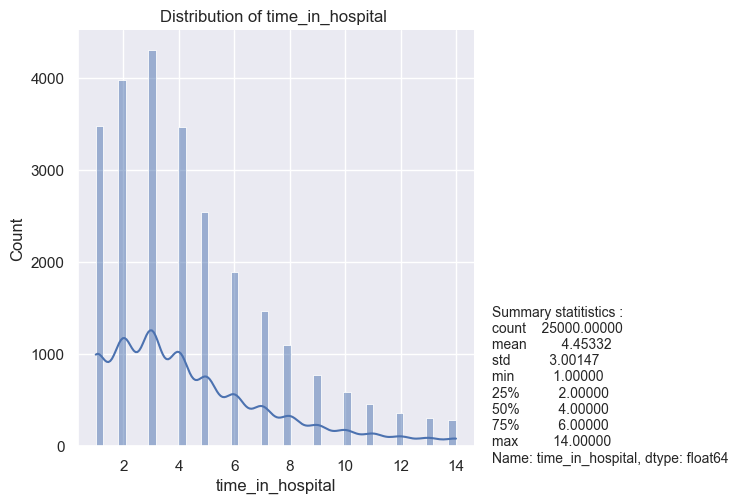

In [55]:
#load necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15, 6)})
sns.set_style("darkgrid")

#def function for displot to use in each numeric column
def numeric_dist(num_col):
    ax = sns.displot(df, x=num_col, kde=True).set(title="Distribution of {col} ".format(col=num_col))
    #add summary statistics as text
    text = str('Summary statitistics : \n{}'.format(df[num_col].describe()))
    ax.fig.text(1, 0.1, text, fontsize=10, transform=plt.gcf().transFigure)
    plt.show()

numeric_dist("time_in_hospital")

Most patients spend between 1 and 5 days, with the most common number of days being 3. The mean waiting days is 4.453, median 4 days, and standard deviation of 3.001.

Possible questions:
- Does this distribution remain the same for all age groups or do some age groups spend more time in hospital than others?
- Is there a relationship between time spent in hospital and either number of lab procedures, number of procedures, and/or number of medications?
- Do patients who spend more time in hospital have higher chances of being readmitted?

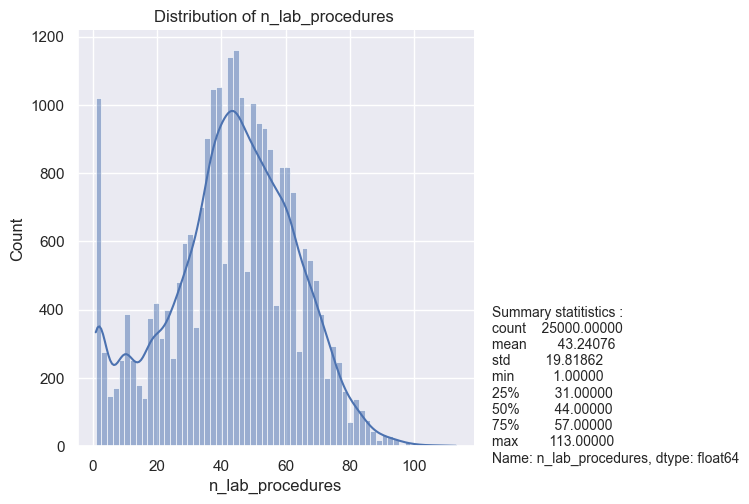

In [56]:
# distribution of number of lab procedures
numeric_dist("n_lab_procedures")

There seems to be a normal distribution, apart from patients who receive only 1 procedure. The min is 1, max 113 lab procedures, mean 43.24 procedures.

Possible questions:
- What's causing the dips accross the distribution?
- Do the number of lab procedures depend on the type diagnostics made? And which diagnostics have cause more lab procedures?
- Is the chance of readmission affected by number of lab procedures taken?

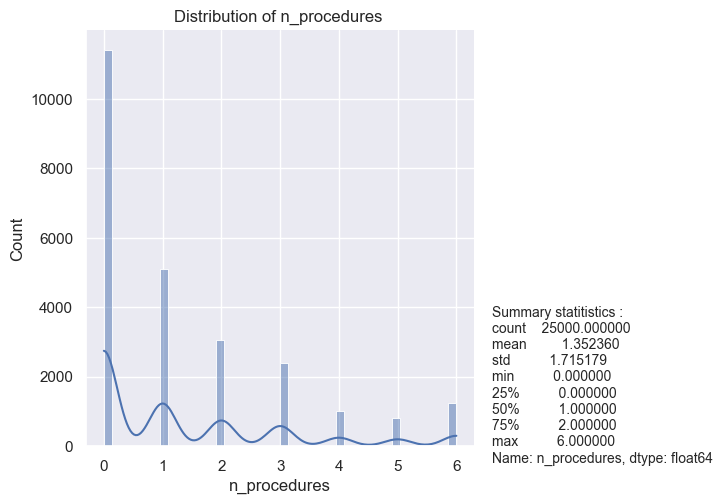

In [57]:
# distribution of number of procedures
numeric_dist("n_procedures")

Half of the patients received only a single procedure (mean), mean procedures are 1.35, min is 0, and max is 6 procedures.

Possible questions:
- Which diagnostics have more procedures?
- What's the relationship between readmission and number of procedures?

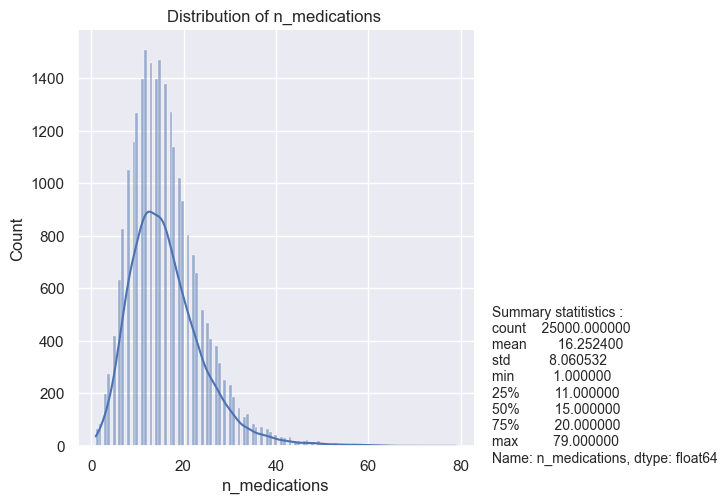

In [58]:
# distribution of number of medications
numeric_dist("n_medications")

there is a right tail to the distribution considering that the 75th percentile is 20 while max medications are 79. The mean is 16.25, median 15, adn min 1.

Possible questions:
- Which diagnostics have more or fewer medications?
- Do patients with high glucose levels get prescibed few or many medications?
- Is there a positive correlation between medications and number of procedures?
- Is there a positive correlation between medications and number of days spent in hospital?
- What's the relationship between readmission probability and number of medications?

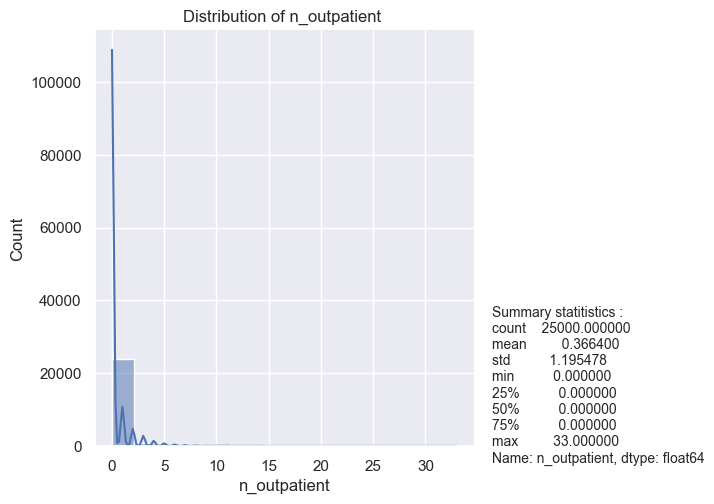

In [59]:
# distribution of number of procedures
numeric_dist("n_outpatient")

More than 3/4 of the patients received no outpatient services before their hospital stay. Mean is 0.366, median is 0. Based on this, we might need to drop this column since it doesn't offer much info.

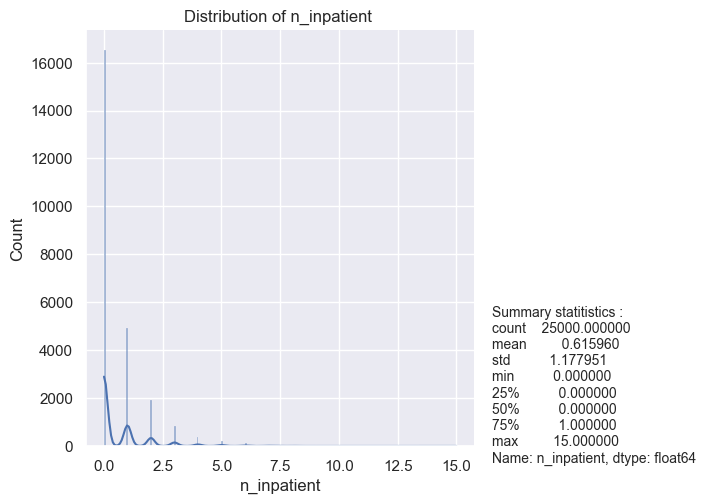

In [60]:
# distribution of number of procedures
numeric_dist("n_inpatient")

Most of the patients received 0 inpatient services before the hospital visit considering that the median is 0. The mean is 1.178 and max is 15.

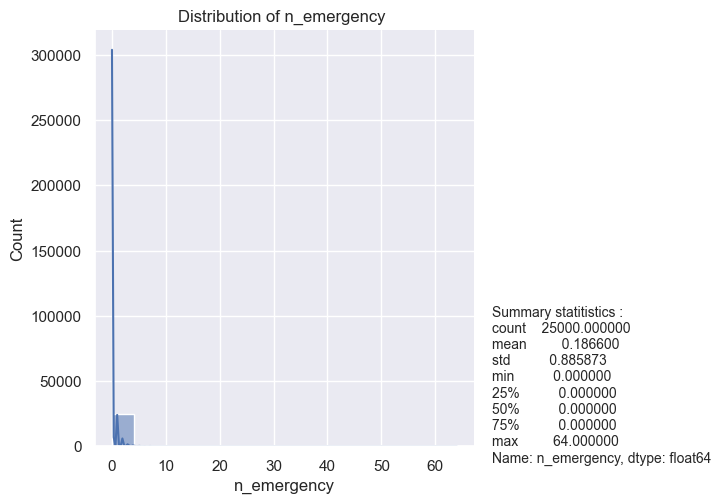

In [61]:
# distribution of number of procedures
numeric_dist("n_emergency")

More than 3/4 of the patients served hadn't visited the emergency room in the year prior to their hospital stay. The mean is 0.187 and the max is 64. We might also need to drop this column

In [62]:
df.drop(columns=["n_outpatient", "n_emergency"], inplace=True)

### step 2.1.2. Check graphical distribution of categorical columns

In [63]:
#create a function for plotting distribution of categorical columns. 
def cat_distribution (col_cat):
    #create a distplot
    ax = sns.countplot(data=df, x=col_cat)
    
     #show count of each unique value
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha=  'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
   
    ax.set(title="Distribution of {}".format(col_cat))
    ax.tick_params(axis='x', rotation=90)
    plt.show()

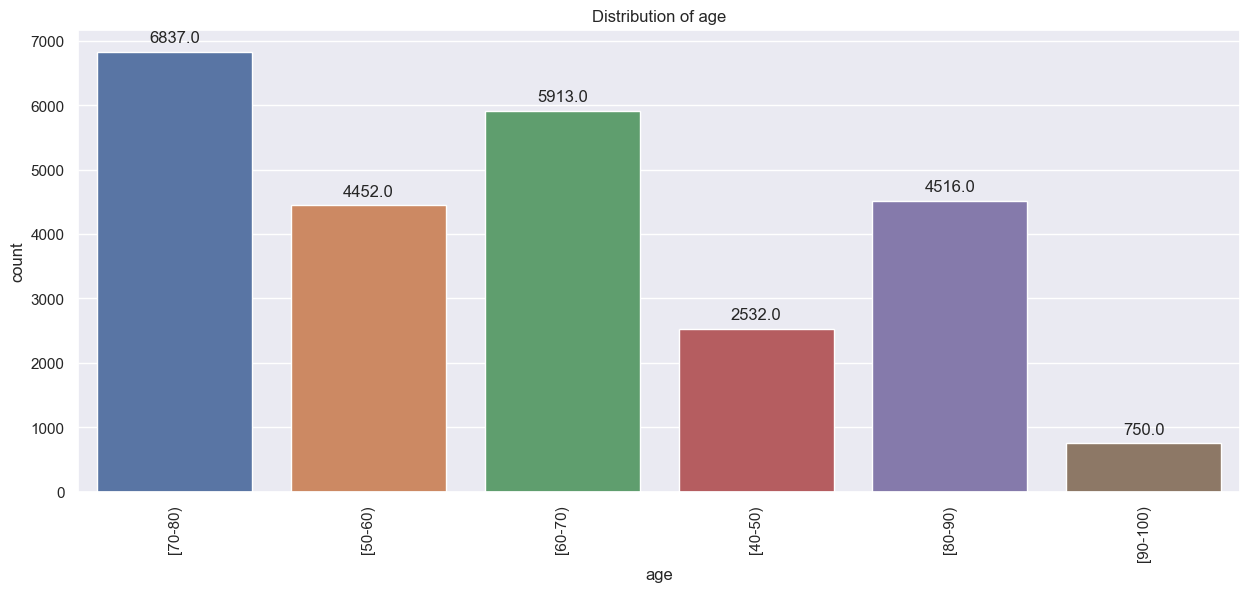

In [64]:
#distribution of age
cat_distribution("age")

the age group (70-80) has the highest number of patients at 6,837, foollowed by (60-70). (90-100) has the least number of patients.

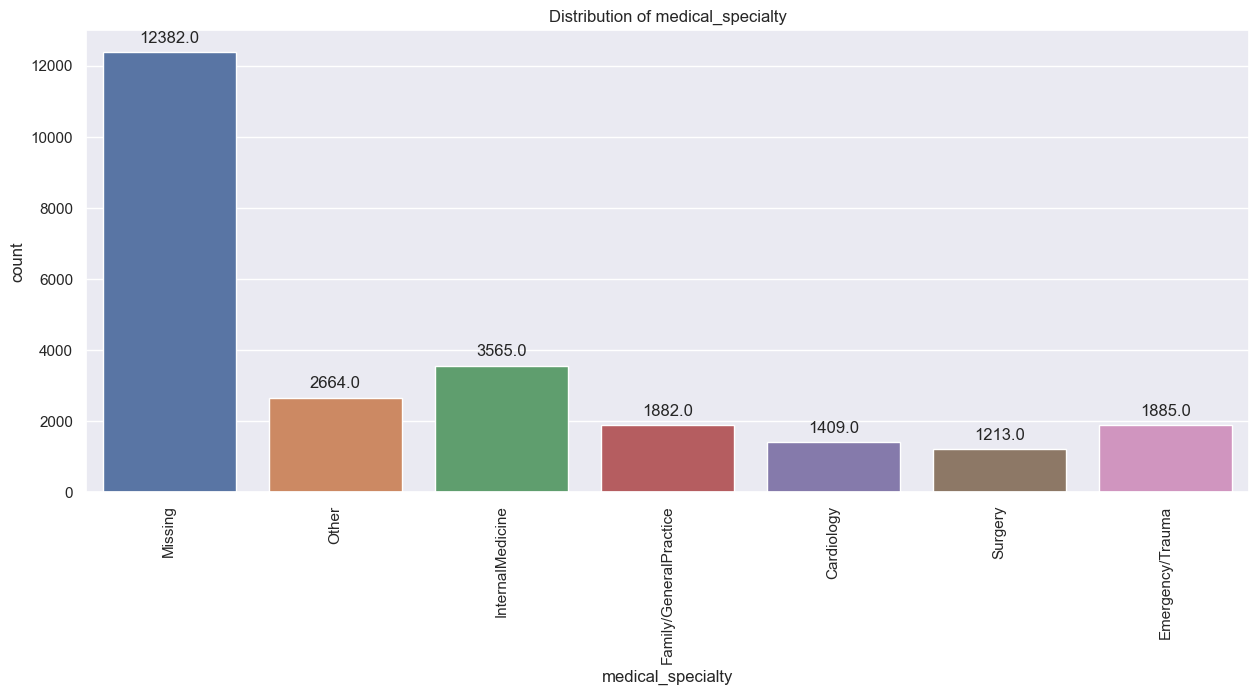

In [65]:
#distribution of medical specialty
cat_distribution("medical_specialty")

12,382 records have missing doctor specialization. InternalMedicine managed to attend to 3,565 patients followed by category 'other' at 2,664. The category with least count surgery. 

Possible questions:
How does this relate to number of days patients spent in hospital, type of diagnosis?

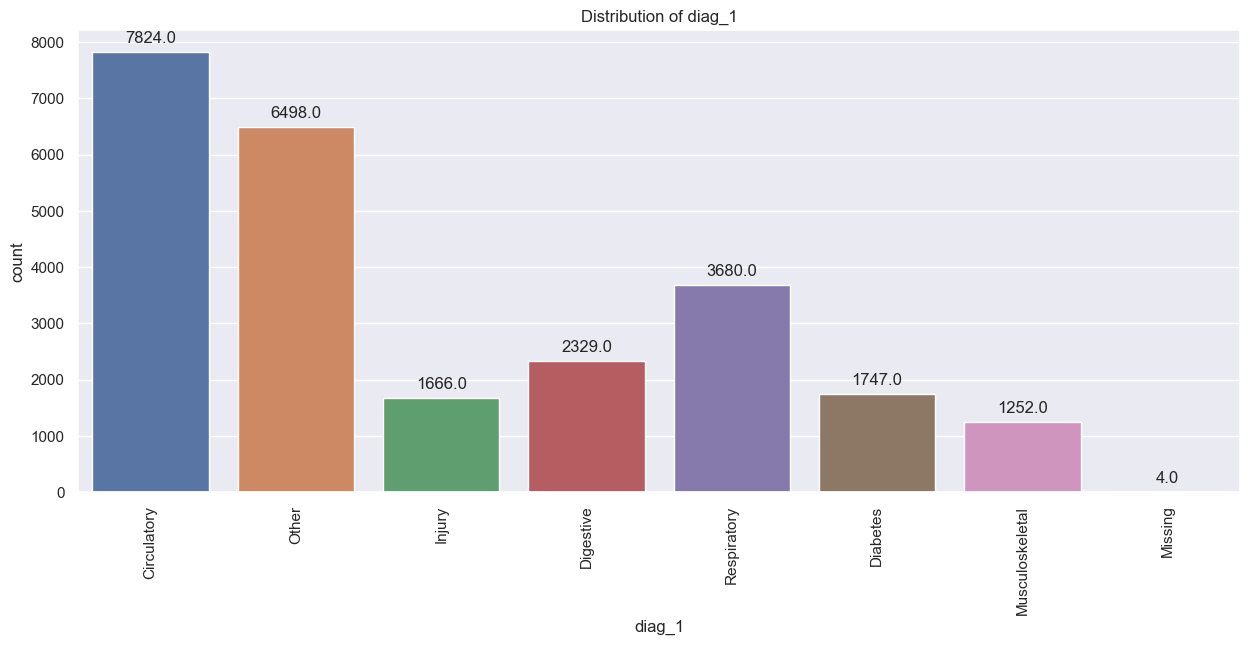

In [66]:
cat_distribution("diag_1")

Circulatory diagnosis is the most frequent primary diagnosis among the patients followed by Other and respiratory. There were four instances with Missing diagnosis.

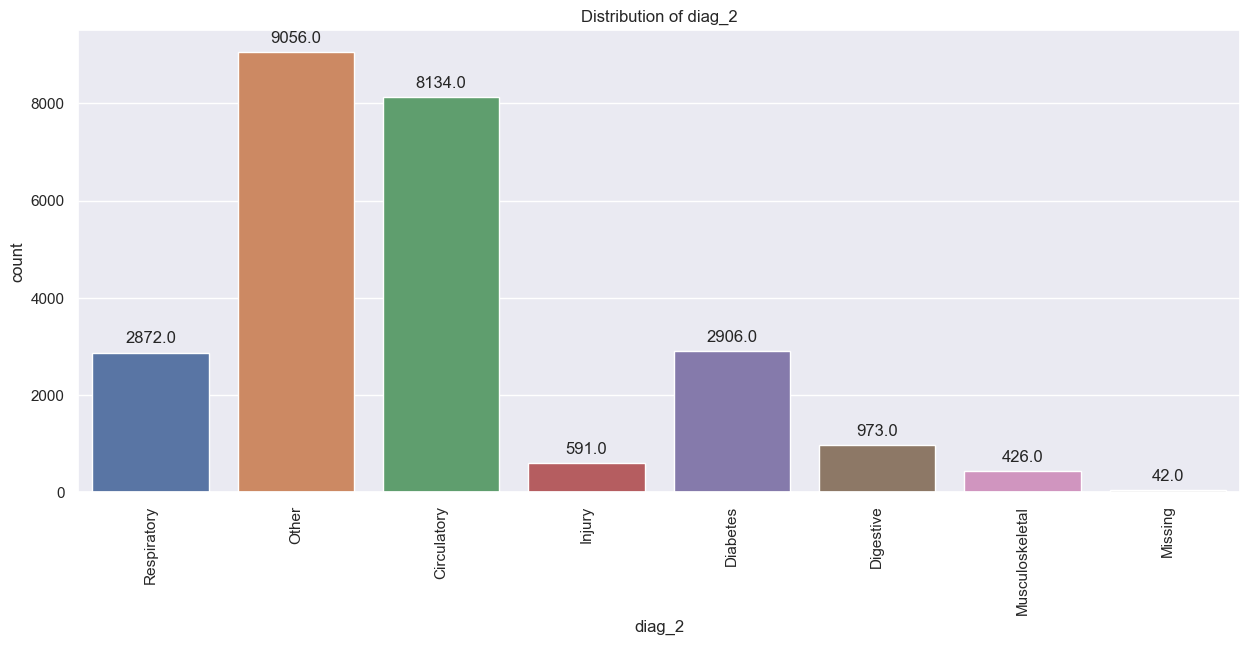

In [67]:
#distribution of diag_2
cat_distribution("diag_2")

Circulatory is still high in secondary diagnosis. Interestingly, there are more instances of diabetes in secondary diagnosis.

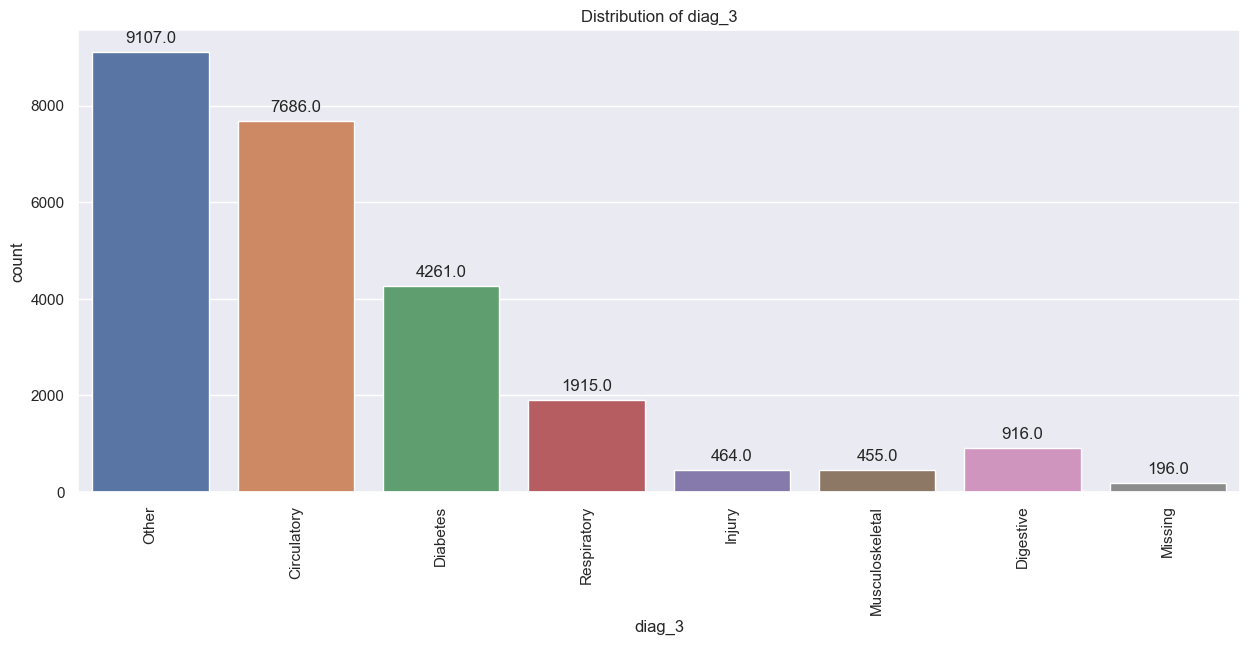

In [68]:
#distribution of diag_3
cat_distribution("diag_3")

Circulatory is also high in this instances as well as diabetes.

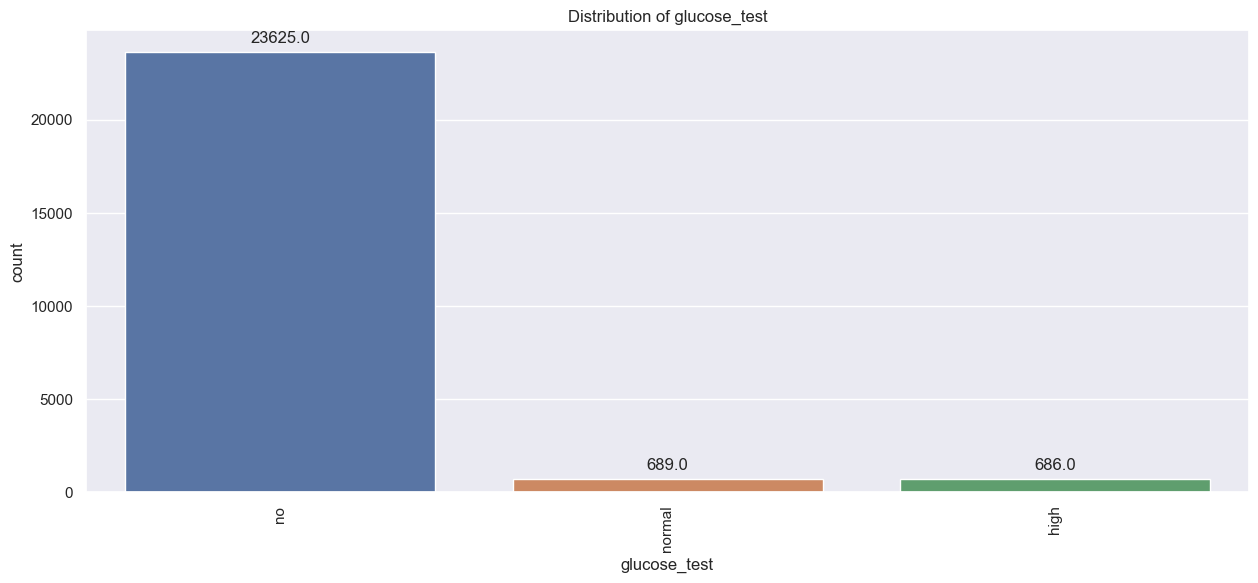

In [69]:
#distribution of glucose test
cat_distribution("glucose_test")

Glucose test was not performed on 23,625 of the patients. Why? 

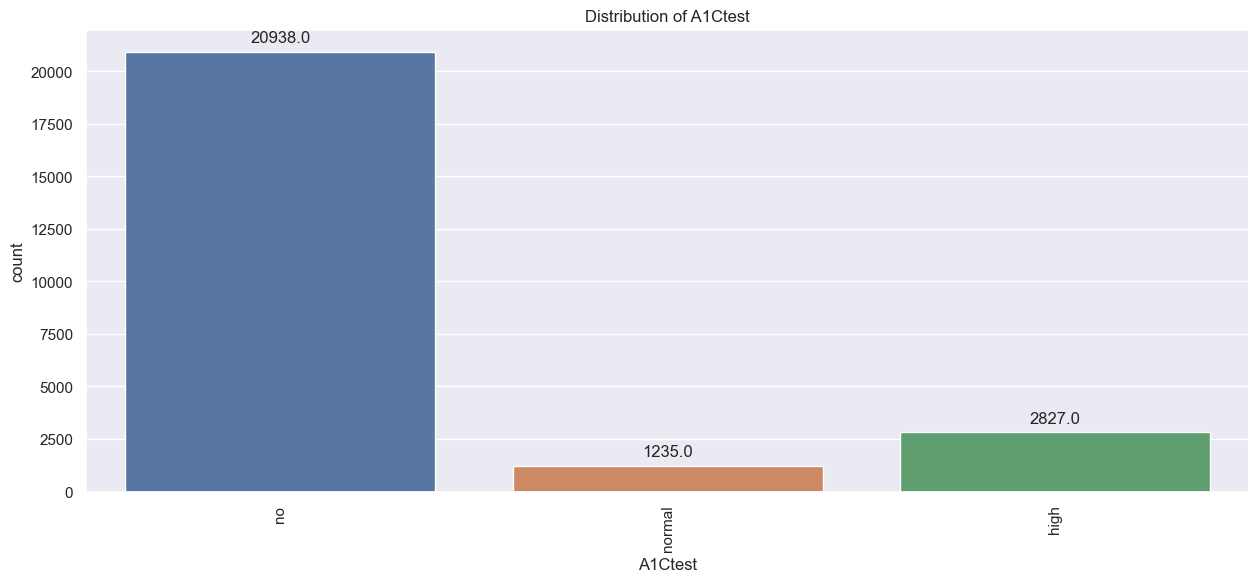

In [70]:
#distributio of A1Ctest
cat_distribution("A1Ctest")

Similar to glucose test, A1Ctest was not performed on 20,938 of the patients. 2,827 patients were found to have high A1C levels. 

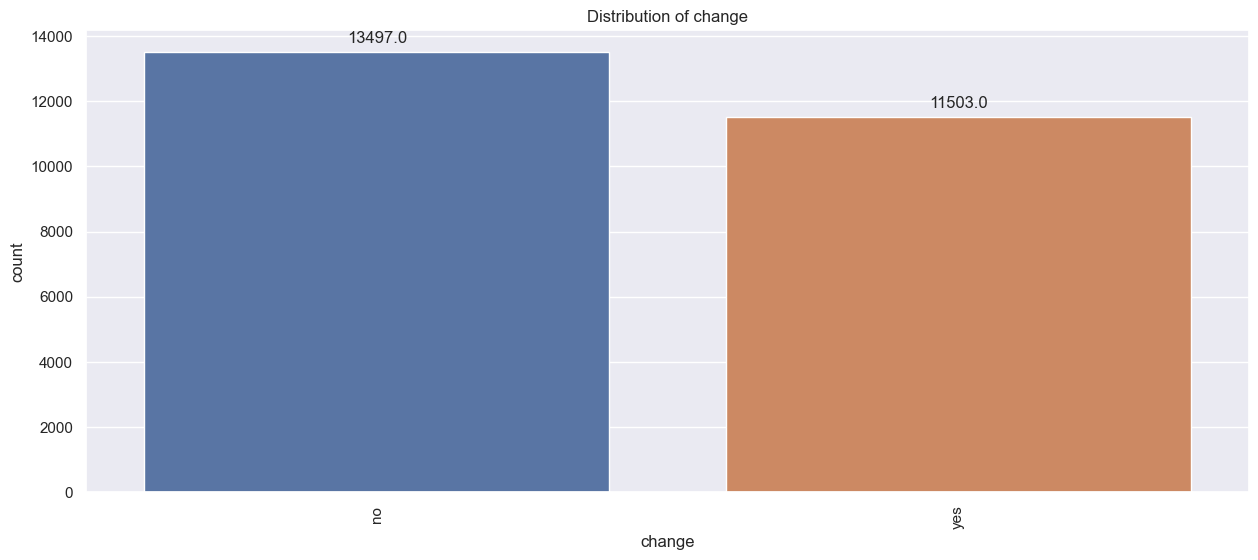

In [71]:
#distribution of change
cat_distribution("change")

13,497 patients didn't have their diabetes medication change while 11,503 patients had a diabetes medication change.

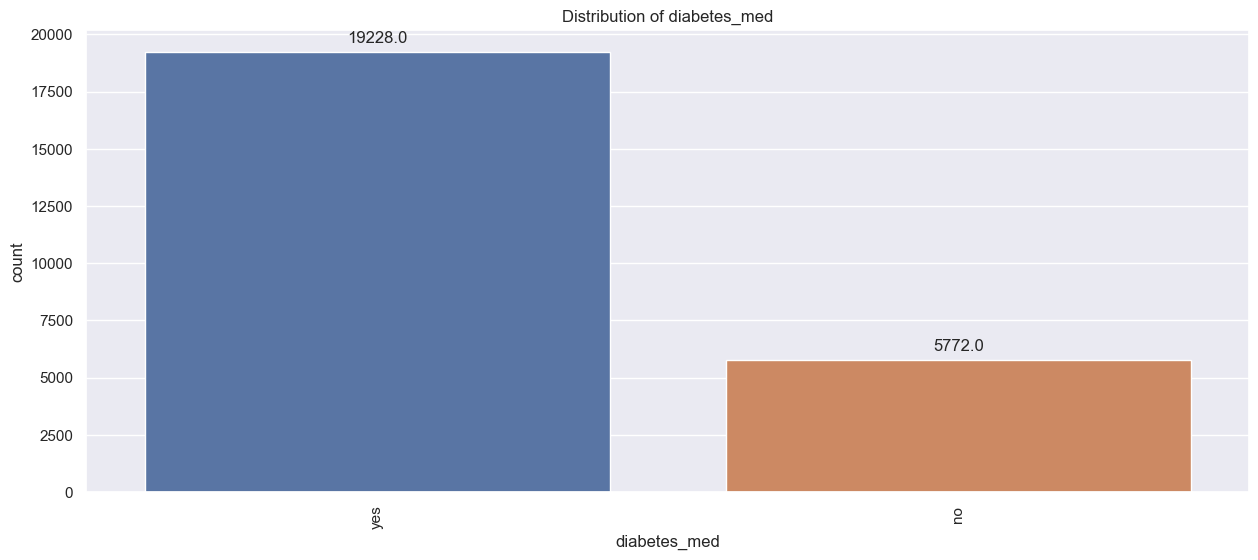

In [72]:
#distribution of diabetes_med
cat_distribution("diabetes_med")

19,228 patients had a diabetes medication prescribed while 5,772 patients weren't prescribed diabetes medication.

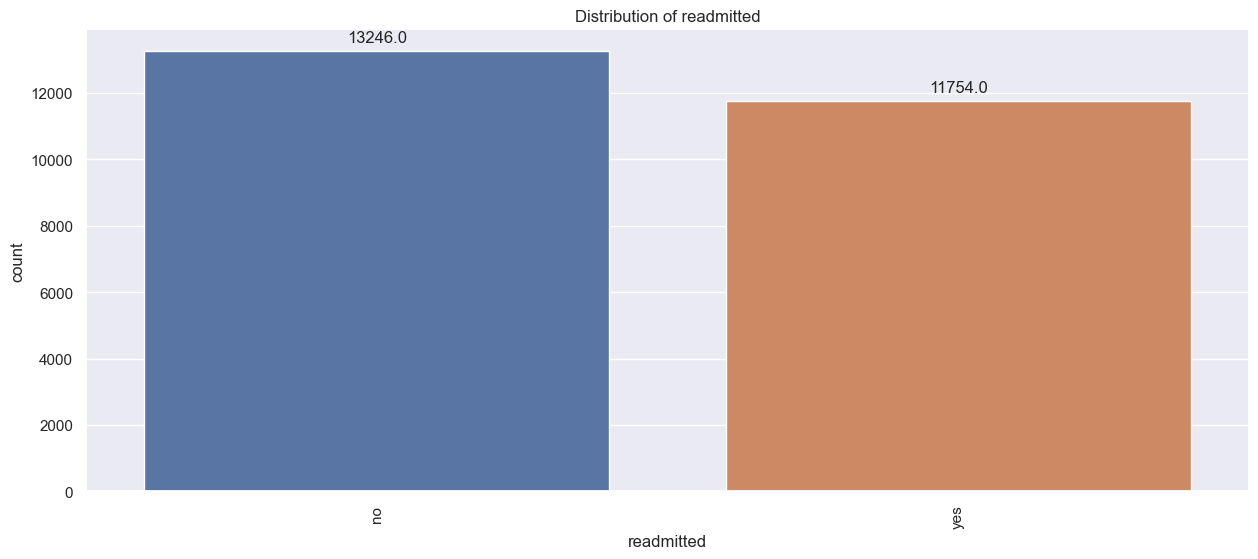

In [73]:
#distribution of readmitted
cat_distribution("readmitted")

13,246 patients weren't readmitted while 11,754 patients were readmitted.

## Step 2.2 Bivariate Analysis

There is no correlation between the numeric columns. The only significant correlation is between n_medications and time_in_hospital, having a correlation of 45%, which is moderately weak.

### What is the most common primary diagnosis by age group?

In [74]:
# group age_group by primary diagnosis
df.pivot_table(index='age', columns='diag_1', aggfunc='size', fill_value=0)

diag_1,Circulatory,Diabetes,Digestive,Injury,Missing,Musculoskeletal,Other,Respiratory
age,,,,,,,,
[40-50),504,369,271,162,0,100,750,376
[50-60),1256,393,442,273,0,230,1164,694
[60-70),1962,385,554,400,1,373,1402,836
[70-80),2392,385,585,444,1,373,1693,964
[80-90),1482,181,402,321,2,168,1269,691
[90-100),228,34,75,66,0,8,220,119


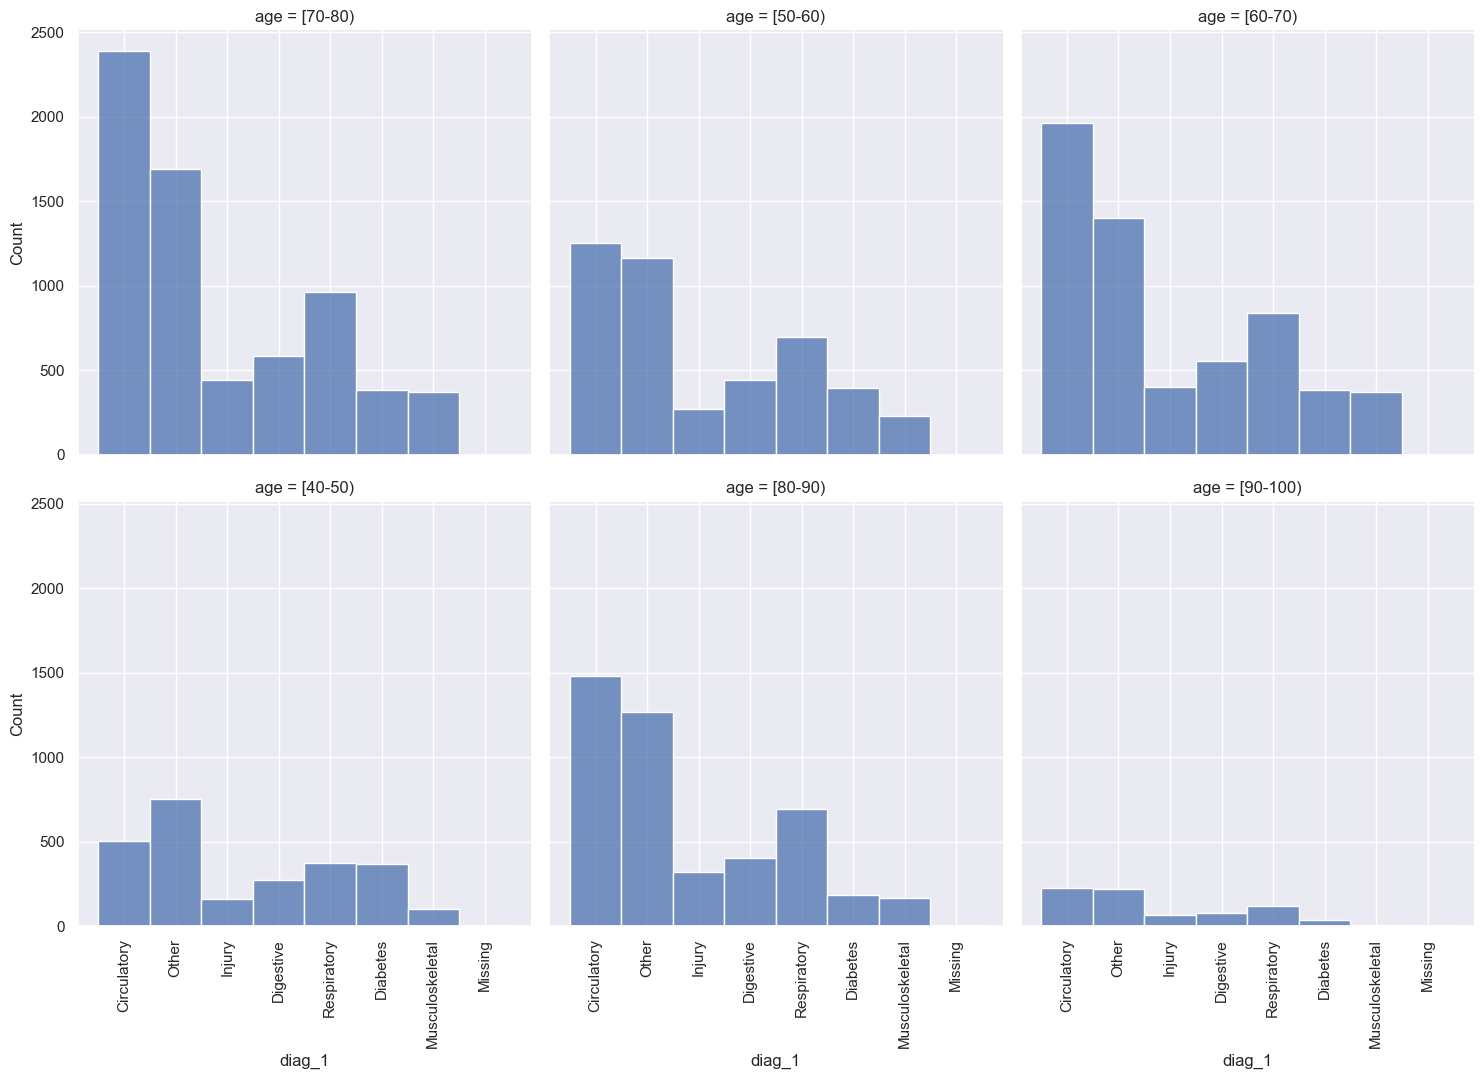

In [75]:
#visual representation of primary diagnosis per age bracket
ax = sns.displot(data=df, x="diag_1", col="age",col_wrap=3, kind='hist')
ax.tick_params(axis='x', rotation=90)

- The most common primary diagnostic for age [40-50] is **'Other'**.
- Most common primary diagnostic for age [50-60] is **'Circulatory'**.
- Most common primary diagnostic for age [60-70] is **'Circulatory'**.
- Most common primary diagnostic for age [70-80] is **'Circulatory'**.
- Most common primary diagnostic for age [80-90] is **'Circulatory'**.
- Most common primary diagnostic for age [90-100] is **'Circulatory'**.

### What's the effect of diabetes on readmission?

### Let's check the statistically if diabetes has an effect on readmission

**NUll Hypothesis**: There is no relationship between diabetes and readmission.

**Alternate Hypothesis**: There is a relationship between diabetes and readmission.

Alpha value = 0.05

**Step 1:** onehot encode the diagnosis columns in df

In [76]:
new_df = pd.get_dummies(df, columns=[ 'diag_1', 'diag_2', 'diag_3'])
new_df = new_df[["diag_1_Diabetes", 'diag_2_Diabetes', 'diag_3_Diabetes','readmitted']]
new_df.head()

,diag_1_Diabetes,diag_2_Diabetes,diag_3_Diabetes,readmitted
0,0,0,0,no
1,0,0,0,no
2,0,0,0,yes
3,0,0,1,yes
4,0,0,0,no


**Step 2.** Create a function for visualizing distribution and performing chi_square test of independence test for diabetes columns vs readmission

In [77]:
#create a function that plots relationship between diabetes and readmission and calculates chi_square

def diabetes_diag(col, df=new_df):
    #creaate a countplot of diabetes diagnosis versus readmission
    ax = sns.countplot(data = new_df.replace({col: {0:"no_diabetes", 1:"diabetes"}}), x=col, hue="readmitted")
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
       
    plt.show()
    
    #create a contingency table for diag_1_Diabetes vs readmitted
    cont_table = pd.crosstab(index=new_df[col], columns=new_df.readmitted)

    #import scipy.stats
    import scipy.stats as stats
    #chi_square test
    (chi2, p_value, dof, _) = stats.chi2_contingency(cont_table)
    
    print ("chi_square results :")
    print (".....................")
    print ("chi2 : {}".format(chi2))
    print ("P_value : {}".format(p_value))
    print ("DOF : {}".format(dof))

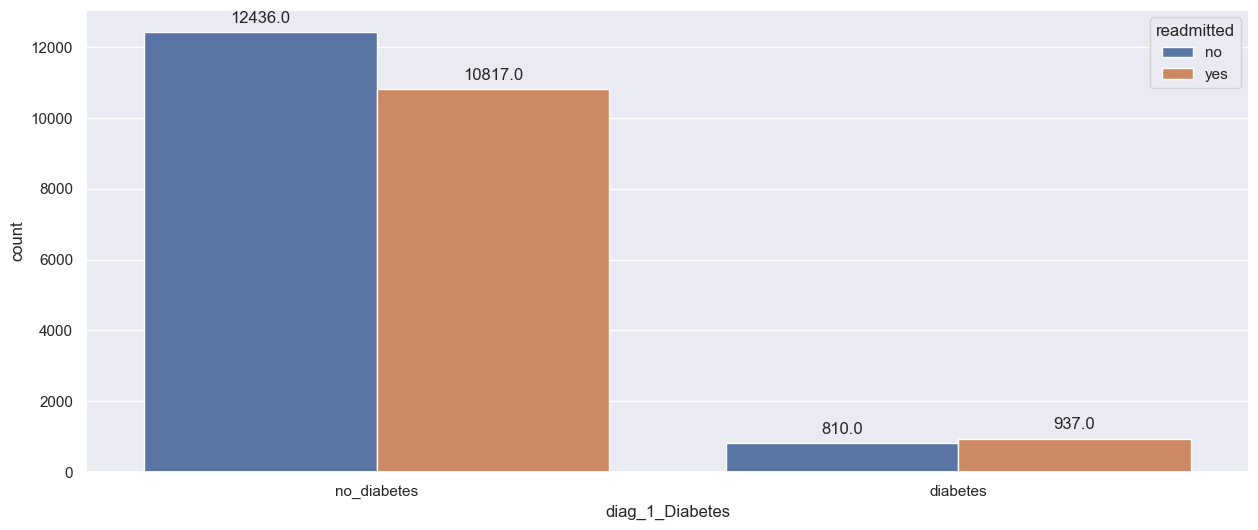

chi_square results :
.....................
chi2 : 32.74600493765014
P_value : 1.0502193040609367e-08
DOF : 1


In [78]:
#let's check the primary diagnosis column
diabetes_diag("diag_1_Diabetes")

P_value is lower than our alpha value of 0.05, meaning that we reject the null hypothesis and conclude that there is statistically significant relationship between diabetes as a primary diagnosis and readmission

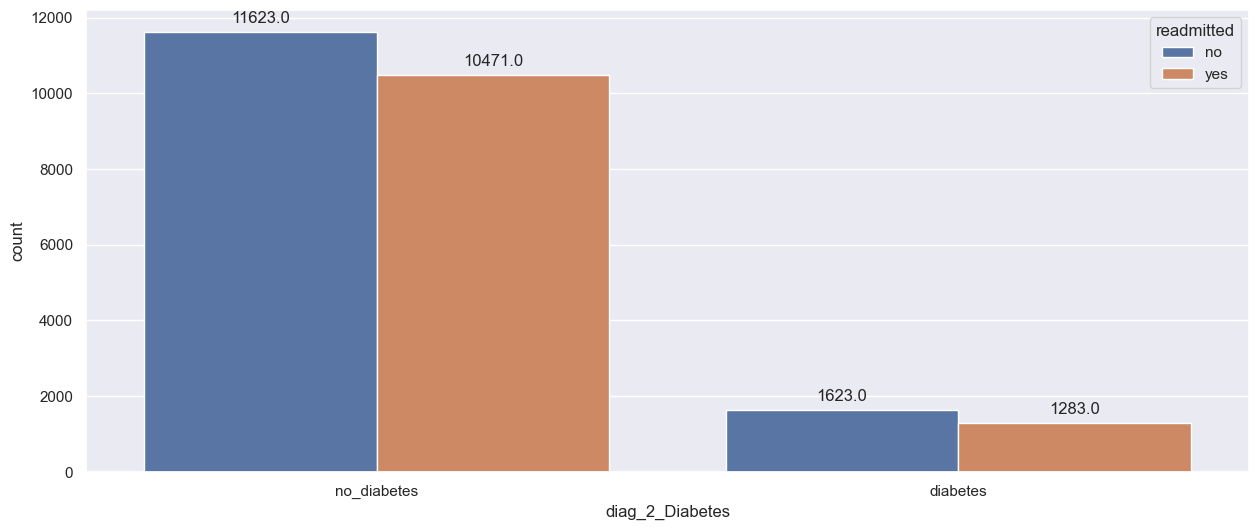

chi_square results :
.....................
chi2 : 10.712294799822368
P_value : 0.001064259480501578
DOF : 1


In [79]:
#check diabetes as a secondary diagnosis
diabetes_diag("diag_2_Diabetes")

Similar to diabetes as a primary diagnostics, the p_value in diabetes as a secondary diagnosis is lower than 0.05, meaning we reject the null hypothesis and conclude that there is a statistically significant relationship between diabetes as a secondary diagnosis and readmission.

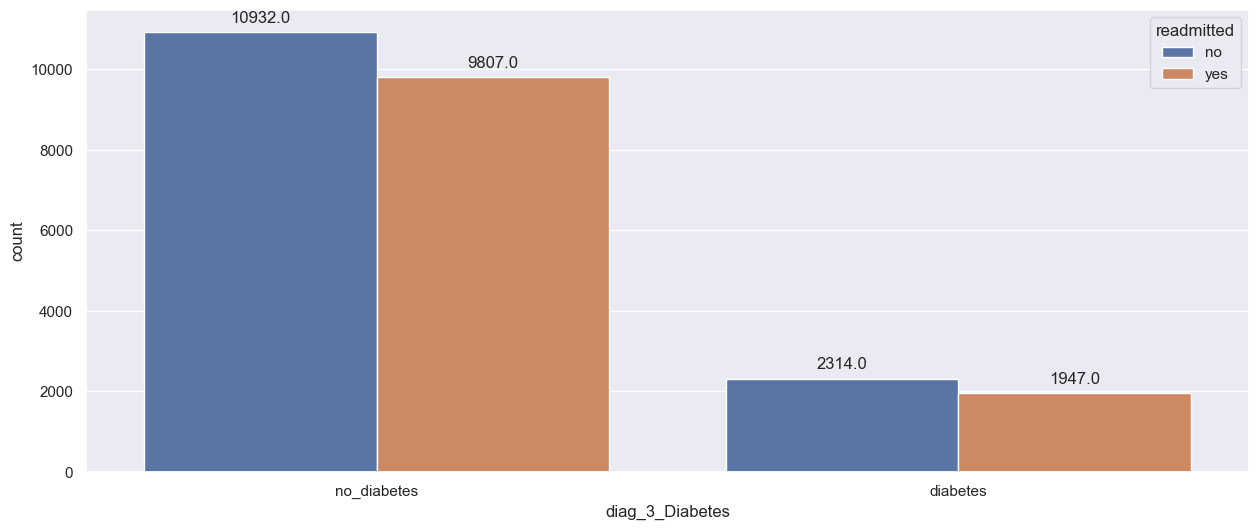

chi_square results :
.....................
chi2 : 3.5426150999523793
P_value : 0.059811091733131365
DOF : 1


In [80]:
#check diabetes as an additional secondary diagnosis
diabetes_diag("diag_3_Diabetes")

The p_value is greater than 0.05, meaning we fail to reject the null the hypothesis and conclude that there is no statistically significant relationship between diabetes as a second secondary diagnosis and readmission

**Answer:** The doctors are correct in assuming that diabetes plays a role in readmission. However, it only does so if it is diagnosed as a primary or secondary diagnosis, but not an additional secondary diagnosis.

# Step 3. What causes readmission?

### Step 3.1 check for bivariate relationship between features and target column

In [81]:
#create a function for checking relationship between numeric columns vs readmission
def num_test(num_col):
    #import ttest_ind
    from scipy.stats import ttest_ind
    #divide df into groups of either readmitted or not
    group1 = df[df["readmitted"] == 'yes']
    group2 = df[df["readmitted"] == 'no']
    #calculate ttest
    t, p_value = ttest_ind(group1[num_col], group2[num_col])
    
    #create a histogram for visual analysis
    sns.distplot(group1[num_col], label="readmitted")
    sns.distplot(group2[num_col], label="Not readmitted")
    plt.legend()
    plt.show()
    print(f't_value :{t}')
    print(f'p_value :{p_value}')

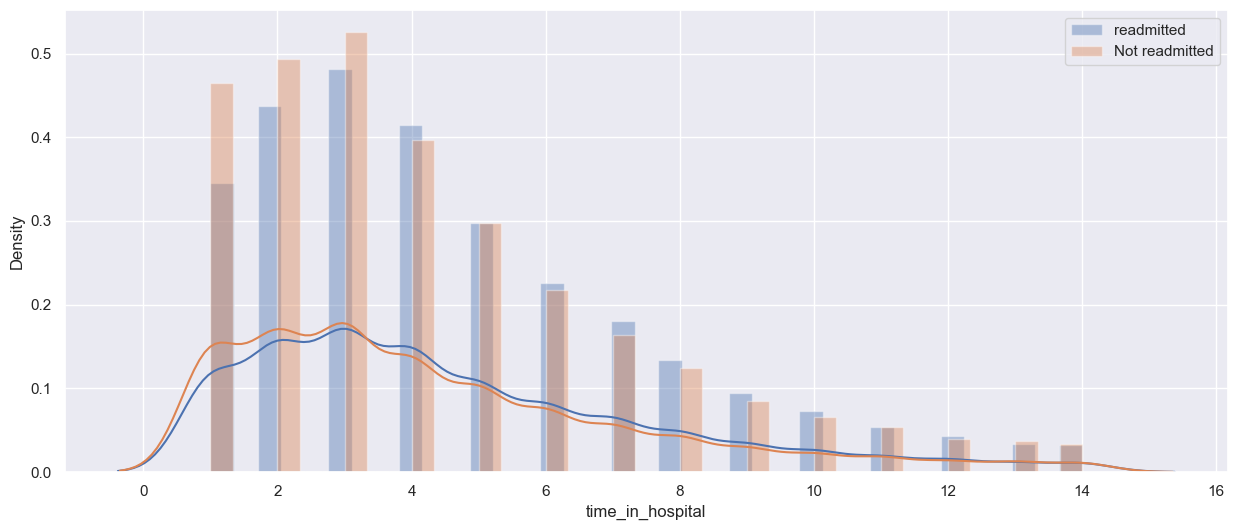

t_value :6.8273333174206705
p_value :8.848708097029043e-12


In [82]:
#test for time in hospital
num_test("time_in_hospital")

Since the p_value is lower than 0.05, we can conclude that time spent in hospital does determine whether a patient will be readmitted or not. Based on the plot, patients who were readmitted spend more time in hospital than those who weren't readmitted.

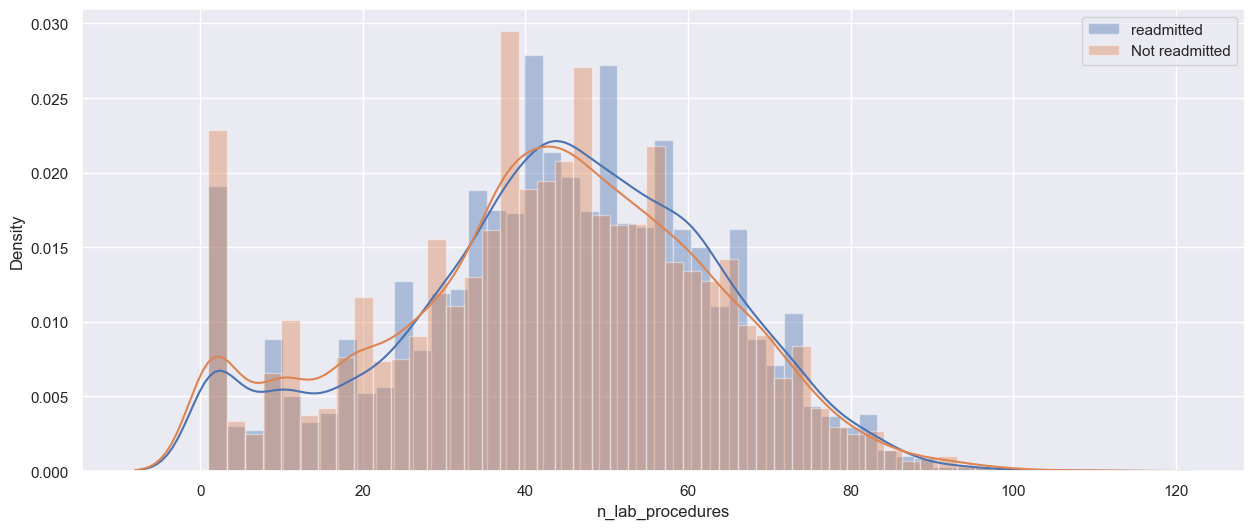

t_value :5.215692768862603
p_value :1.8458980102858898e-07


In [83]:
#n_lab_procedures
num_test('n_lab_procedures')

The p_value is less than 0.05; therefore, we conclude that there is a statistically significant relationship between n_lab_procedures and readmission.

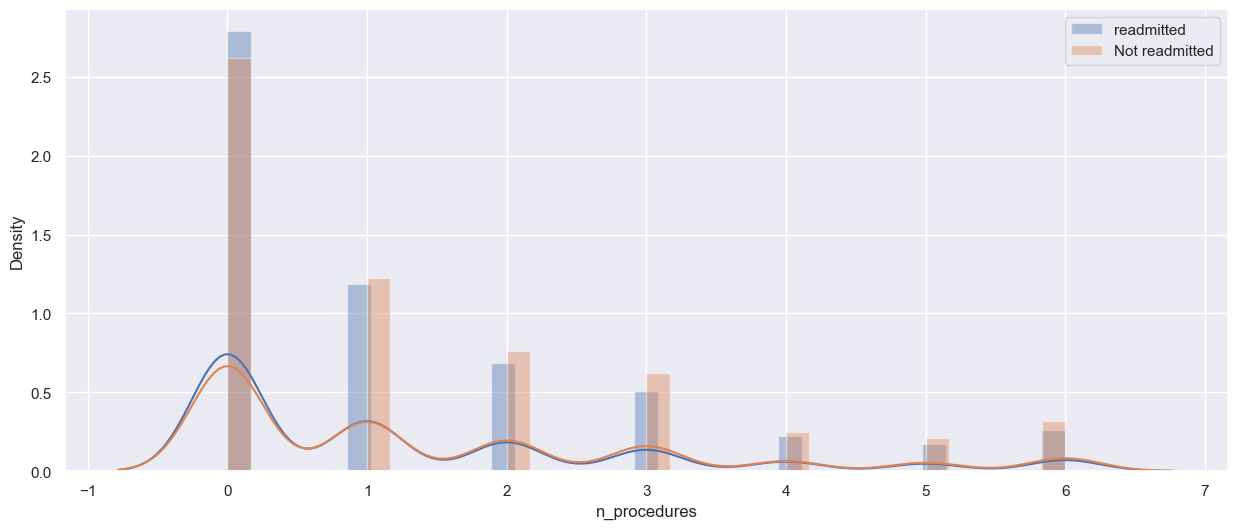

t_value :-7.037506201254703
p_value :2.007614883009888e-12


In [84]:
#n_procdures vs readmission
num_test("n_procedures")

The p_value is less than 0.05; therefore, we conclude that there is a statistically significant relationship between n_procedures and readmission.

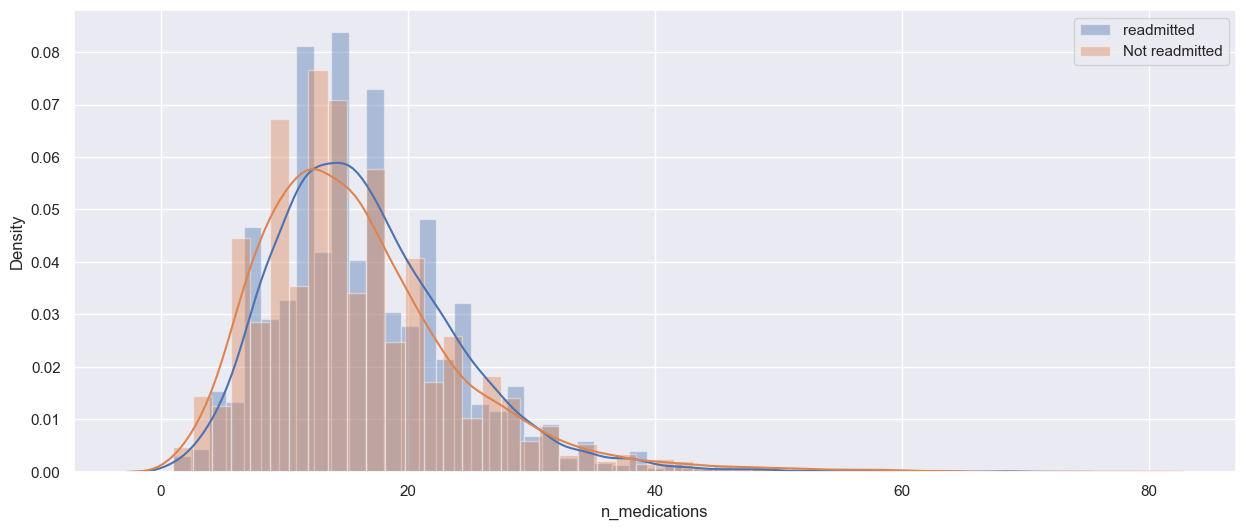

t_value :5.833531455623325
p_value :5.493483833757268e-09


In [85]:
#n_medications
num_test("n_medications")

The p_value is less than 0.05; therefore, we conclude that there is a statistically significant relationship between n_medications and readmission. Based on the graph, readmitted patients received more medications.

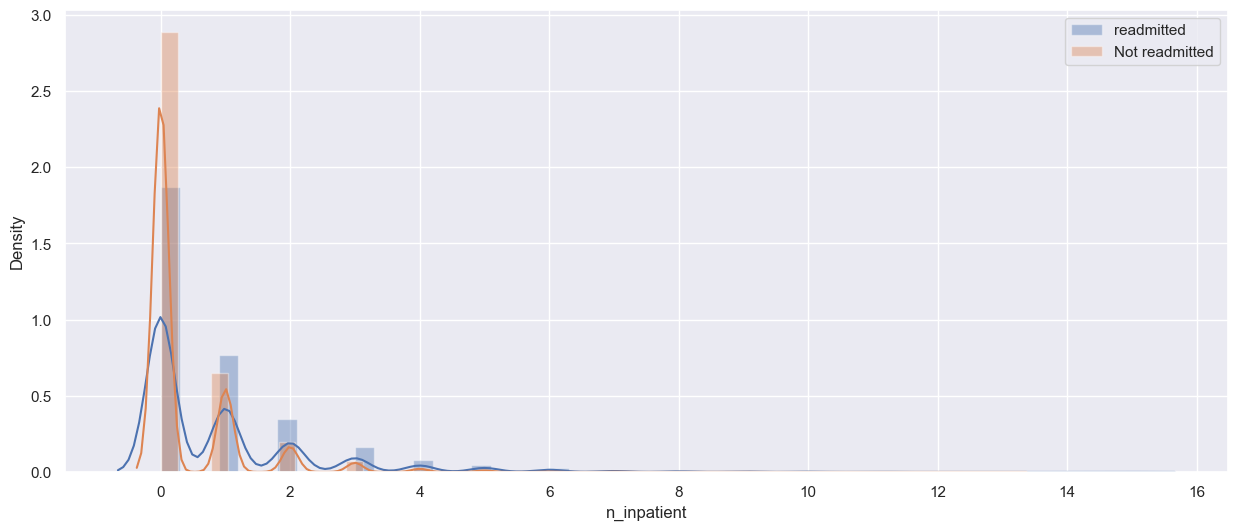

t_value :34.3798232191165
p_value :3.948076436549079e-253


In [86]:
#n_outpatient
num_test("n_inpatient")

The p_value is less than 0.05; therefore, we conclude that there is a statistically significant relationship between n_inpatient and readmission.

### Step 3.2 check for bivariate relationship between features and target column

In [87]:
#create a function that plots relationship between categorical features and readmission, and calculates chi_square

def cat_test(cat_col, df=df):
    #create a countplot of categorical column versus readmission
    ax = sns.countplot(data=df, x=cat_col, hue="readmitted")
    for p in ax.patches:
        ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    plt.show()
    
    #create a contingency table for diag_1_Diabetes vs readmitted
    cont_table = pd.crosstab(index=df[cat_col], columns=df.readmitted)

    #import scipy.stats
    import scipy.stats as stats
    #chi_square test
    (chi2, p_value, dof, _) = stats.chi2_contingency(cont_table)
    
    print ("chi_square results :")
    print (".....................")
    print (f"chi2 : {chi2}")
    print (f"P_value : {p_value}")
    print (f"DOF : {dof}")

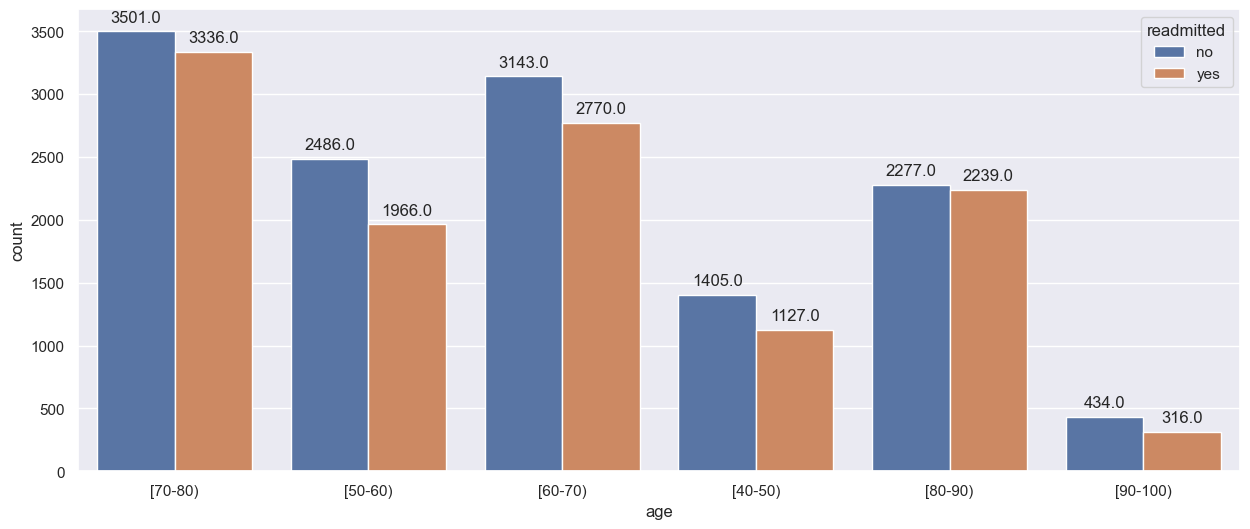

chi_square results :
.....................
chi2 : 48.787297263120706
P_value : 2.4528660957495622e-09
DOF : 5


In [88]:
#Age vs readmission
cat_test('age')

The p_value is less than 0.05, meaning that there is a statistically significant relationship between age and readmission. Age can be used to predict whether a patient will be readmitted or not.

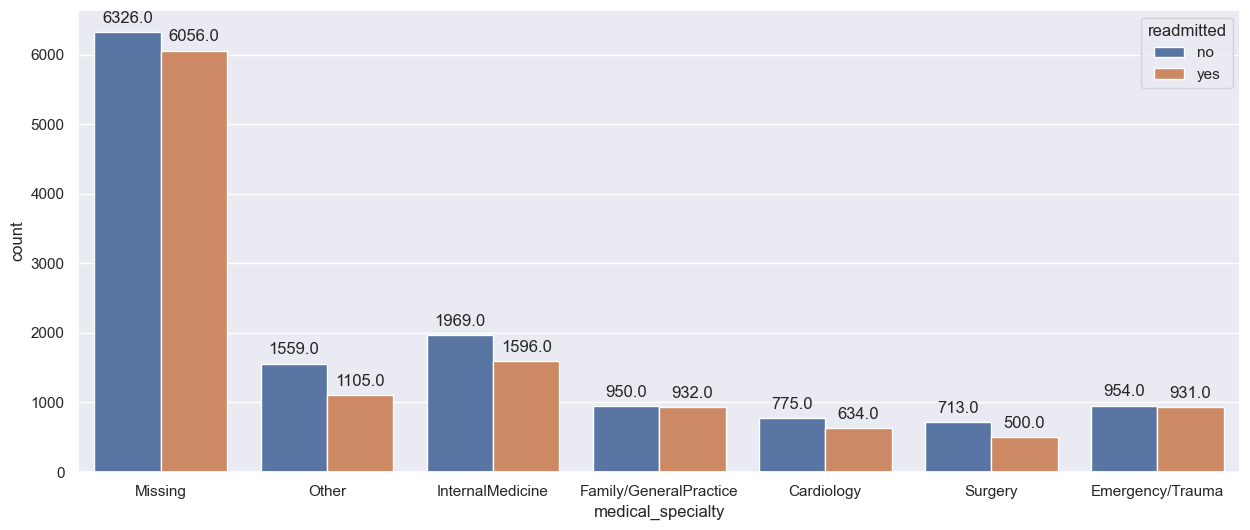

chi_square results :
.....................
chi2 : 85.51193444574233
P_value : 2.5857749465869964e-16
DOF : 6


In [89]:
#medical_specialty vs readmitted
cat_test("medical_specialty")

The p_value is lower than 0.05, meaning that there is a statistically significant relationship between medical specialty and readmission.

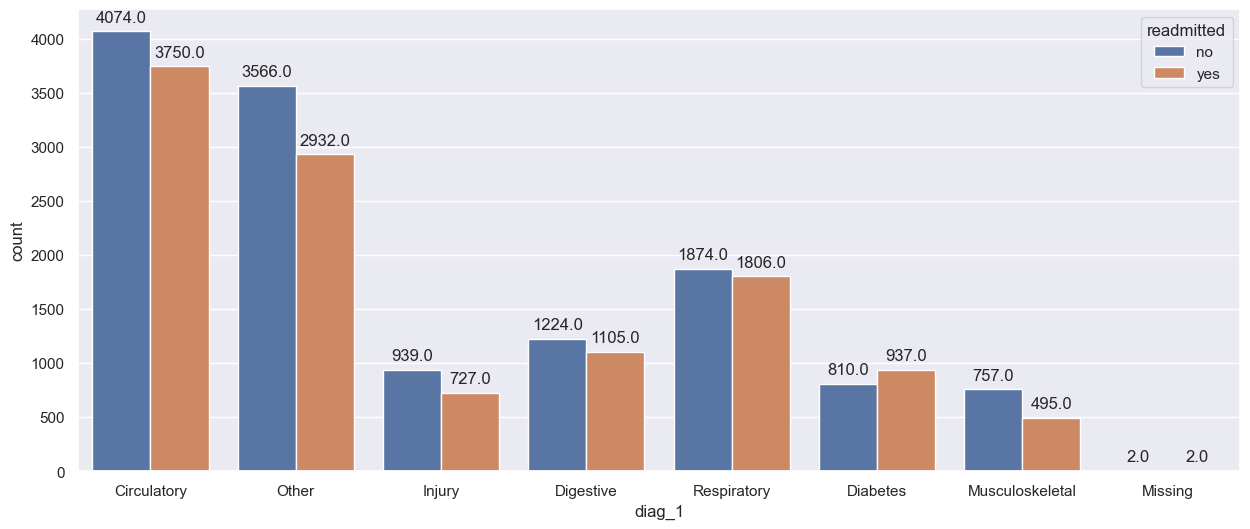

chi_square results :
.....................
chi2 : 84.9093366990503
P_value : 1.3681098778977244e-15
DOF : 7


In [90]:
#diag_1 vs readmission
cat_test("diag_1")

There is a statistically significant relationship between primary diagnostics and readmission. It's interesting that diabetes has more patient readmitted unlike other diagnostics.

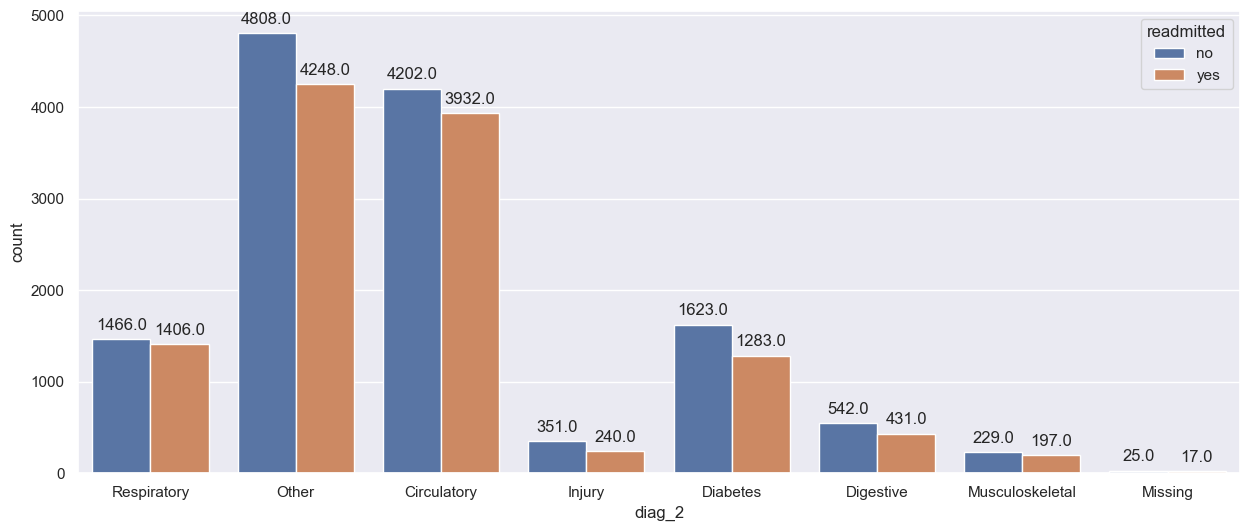

chi_square results :
.....................
chi2 : 33.138251263598946
P_value : 2.4951558937146264e-05
DOF : 7


In [91]:
#secondary diagnosis vs readmission
cat_test("diag_2")

since the p_value is less than 0.05, there is a statistically significant relationship between secondary diagnosis and readmission.

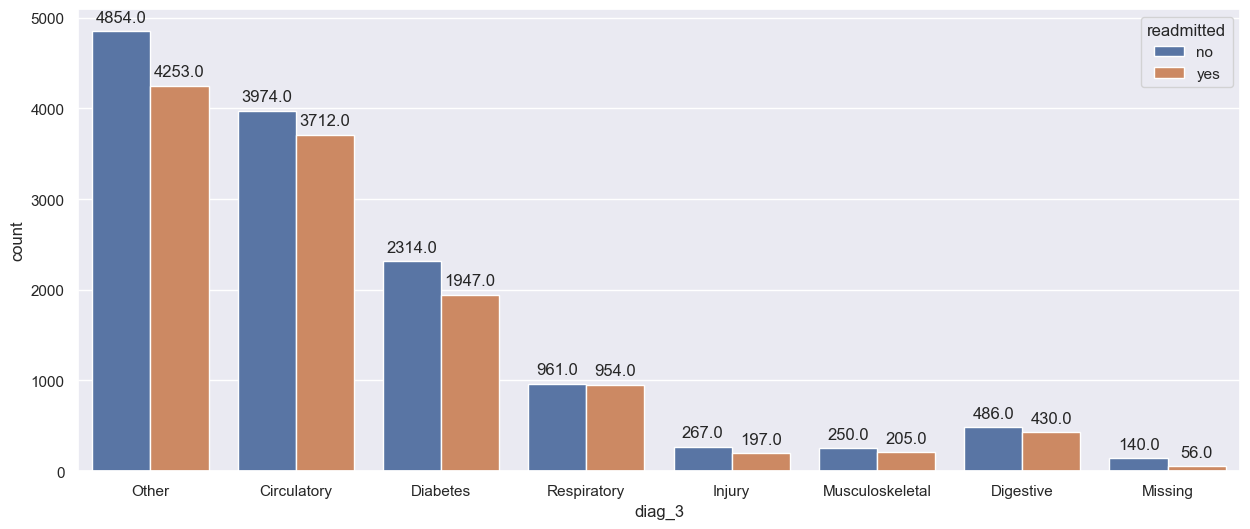

chi_square results :
.....................
chi2 : 45.78323670239515
P_value : 9.633360544317969e-08
DOF : 7


In [92]:
#diag_3 vs readmission
cat_test("diag_3")

There is a statistically significant relationship between additional secondary diagnosis and readmission since the p_value is less than 0.05.

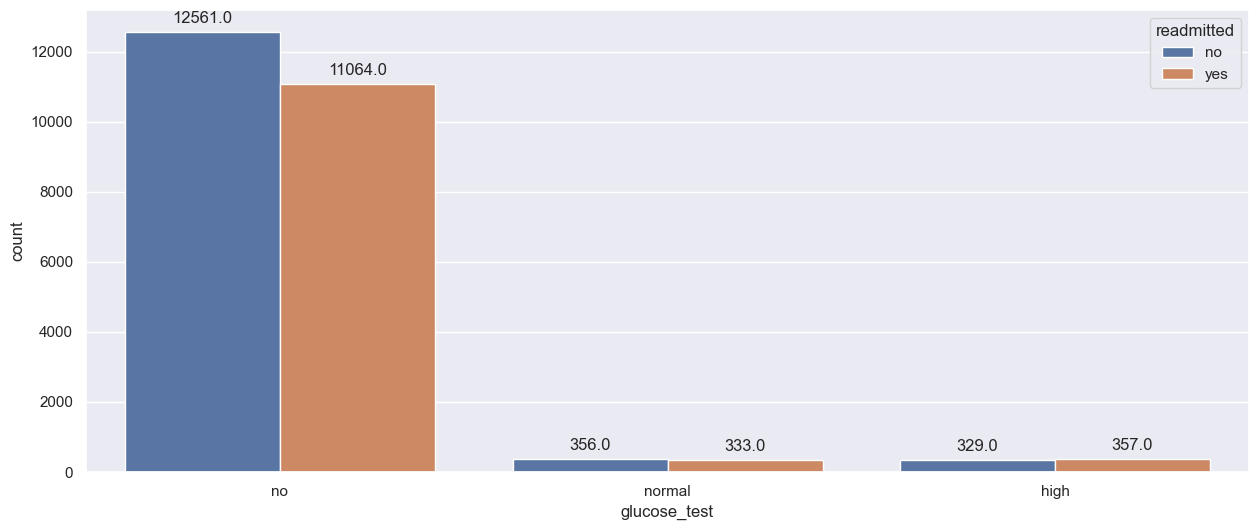

chi_square results :
.....................
chi2 : 7.753214987229586
P_value : 0.020721002208701204
DOF : 2


In [93]:
#Glucose test vs readmission
cat_test('glucose_test')

The p_value is 0.02, meaning there is a statistically significant relationship between glucose test and readmission.

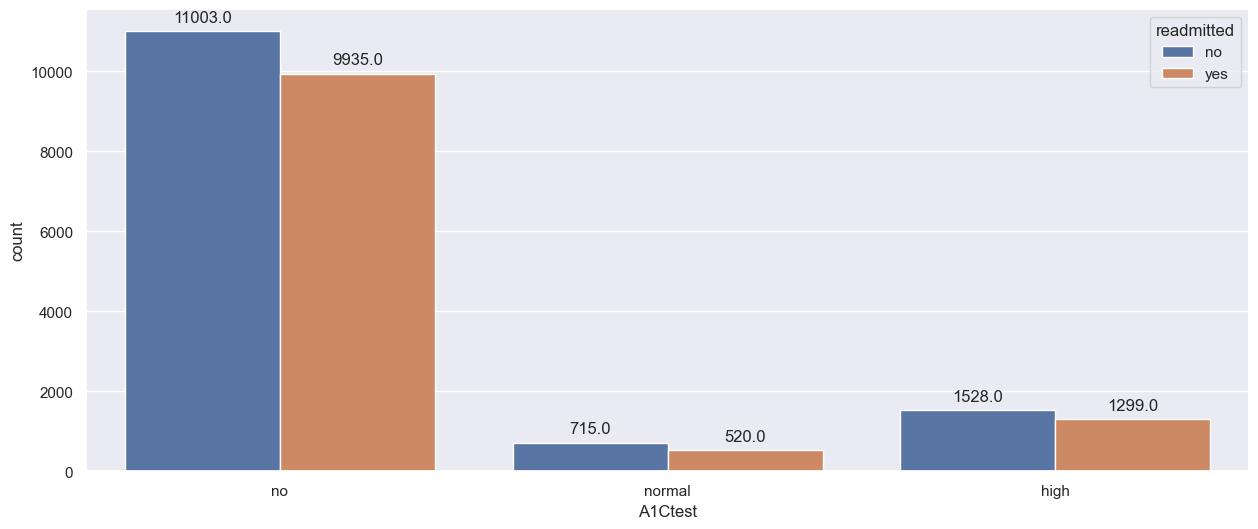

chi_square results :
.....................
chi2 : 14.826035925143096
P_value : 0.0006033470652361825
DOF : 2


In [94]:
#A1Ctest vs readmission
cat_test('A1Ctest')

The relationship between A1Ctest and readmission is statistically significant since the p_value is less than 0.05.

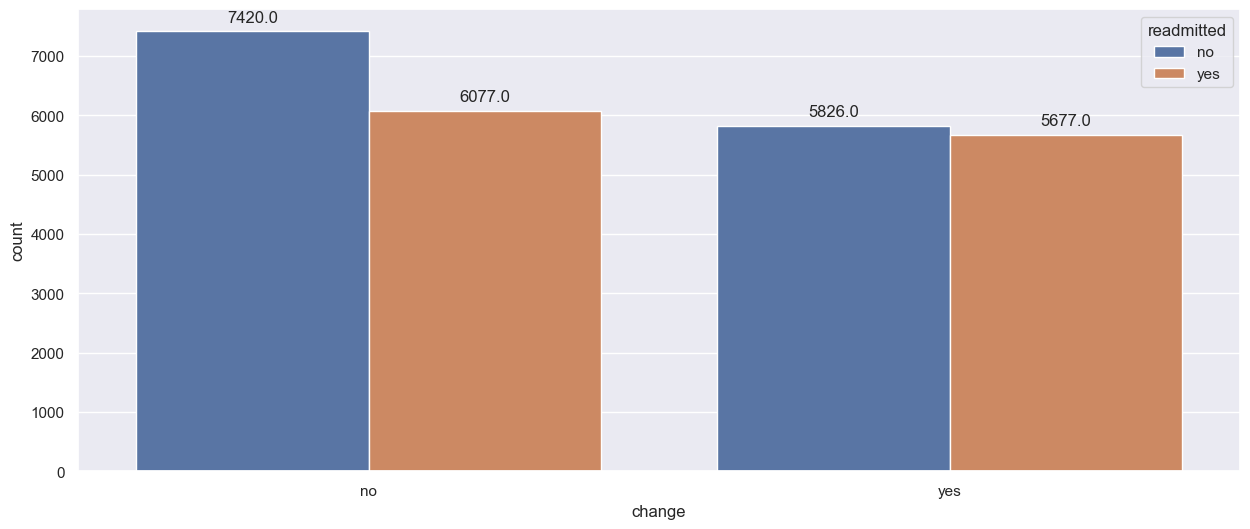

chi_square results :
.....................
chi2 : 46.51351158916284
P_value : 9.098887998980001e-12
DOF : 1


In [95]:
#diabetes medication change vs readmission
cat_test("change")

There is a significant relationship between medications change and readmission.

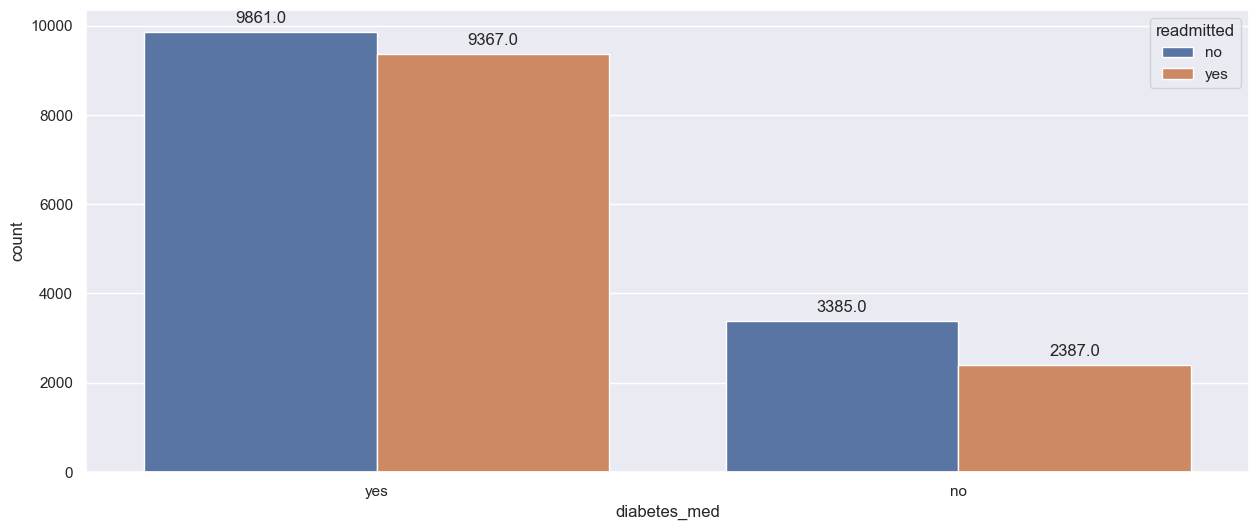

chi_square results :
.....................
chi2 : 96.25564041916765
P_value : 1.0096710996814763e-22
DOF : 1


In [96]:
#diabetes_med vs readmission
cat_test("diabetes_med")

The relationship is statistically significant; therefore, one of the columns can be used to predict the other. In this case, diabetes medication can be used to predict whether a patient will be readmitted.

### Bivariate Analysis summary
All the independent columns do individually have a significant association with the dependent column ("readmitted") based on the above analysis. However, we need to check multivariate relationship to know which combination of feature columns can be used to predict whether a patient will be readmitted or not.

## Step 3.2 Multivariate relationship between the independent variables and readmission
For this step, we will use RandomForestClassifier to find the independent variables that help predict the rate of readmission.

Step 1 is encoding the data. Since we will be using RandomForestClassifier, which is a tree-based classifier, we don't need to scale the data.

However, we might need to drop any columns with the term "Missing", for example, "medical_specialty_Missing" as these can't be accurately called when predicting if a patient will be readmitted or not.

In [97]:
#encode the categorical columns
X_df = pd.get_dummies(df, columns=['age', 'medical_specialty', 'diag_1', 'diag_2',
       'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med'])

#let's drop encoded column with the term 'other' as it doesn't help at all in informing our data.
#divide data into features and target
for col in X_df.columns:
    if "Missing" in col:
        X_df.drop(columns=[col], axis=1, inplace=True)
        
#Get the features and label        
X = X_df.drop(["readmitted"], axis=1)
y = X_df["readmitted"]

#import the necessary packages
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

#split and scale the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Fit model and predict
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print (f"Accuracy : {accuracy}")

Accuracy : 0.5892


While the accuracy is low, we can still use this model to determine the most important features in determining if a patient will be readmitted or not.

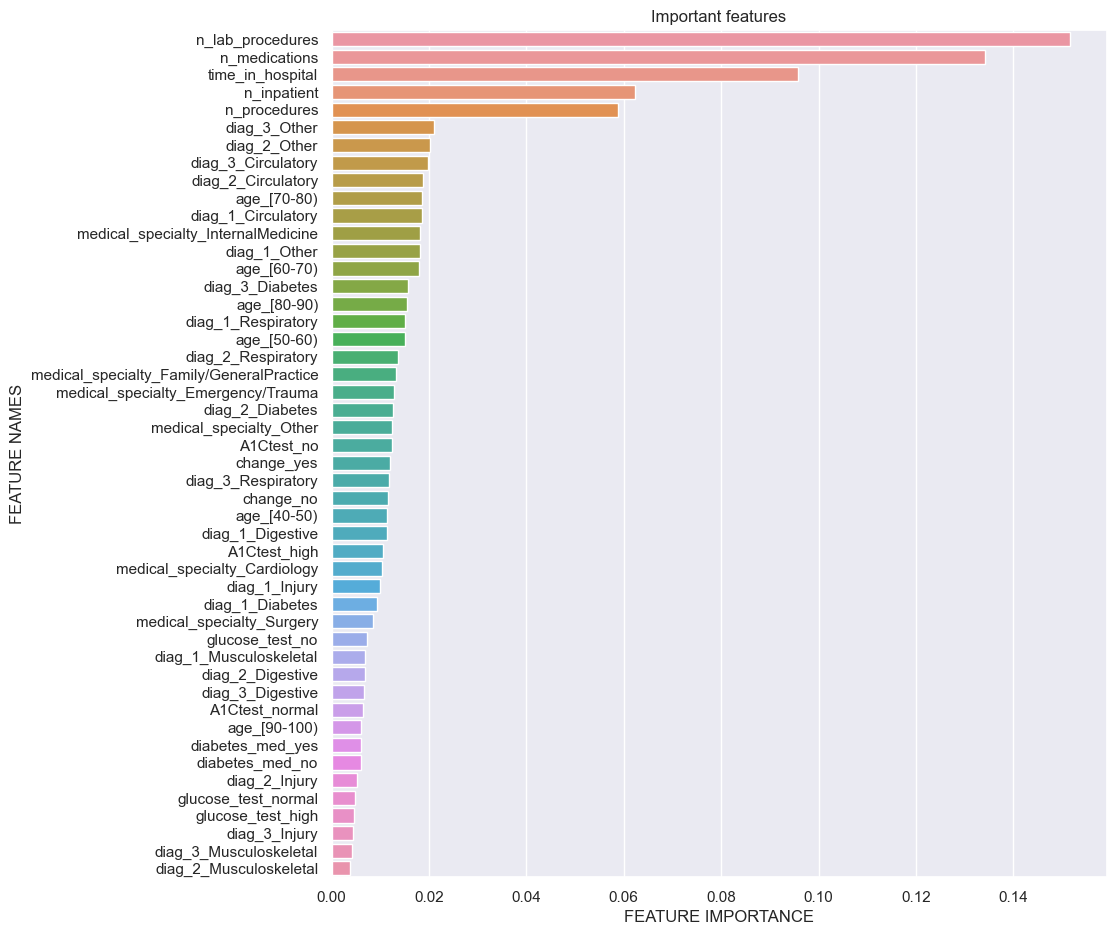

In [98]:
#create a function for plotting feature importances

def plot_feature_importance(importance, names):

    #Create arrays from feature importance and feature names
    import numpy as np
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,11))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title("Important features")
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

plot_feature_importance(classifier.feature_importances_, X.columns)

The important features that the doctors should consider are: n_lab_procedures, n_medications, time_in_hospital, n_inpatient, n_procedures, other diagnostics for both primary and secondary diagnosis, circulatory diagnosis as either as either 3, 2 or 1st diagnostic, and ages 70-80, 60-70.

In [107]:
#Model tuning for improved accuracy
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
#estimators
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
#max_features
max_features = ['log2', 'sqrt']
#max_depth
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
#min_samples_split
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
#min_samples_leaf
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
#bootstrap
bootstrap = [True, False]

param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
#create the estimator
estimator = RandomizedSearchCV(estimator=classifier, param_distributions=param_dist, n_iter=100, cv=3, verbose=1, n_jobs=-1, random_state=42)
#fit the estimator
estimator.fit(X_train, y_train)
print(estimator.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 900, 'min_samples_split': 28, 'min_samples_leaf': 34, 'max_features': 'sqrt', 'max_depth': 13, 'bootstrap': True}


In [112]:
#fitting the new model with tuned hyperparameters.
forest = RandomForestClassifier(n_estimators=900, min_samples_leaf=34, min_samples_split=28, max_features='sqrt', max_depth=13, bootstrap=True)
forest.fit(X_train, y_train)
preds = forest.predict(X_test)
accuracy = accuracy_score(y_test, preds)
print(f"accuracy : {accuracy}")

accuracy : 0.6093333333333333


We get an improvement from 58.9% to 60.93%. Let's check if the important features changed.

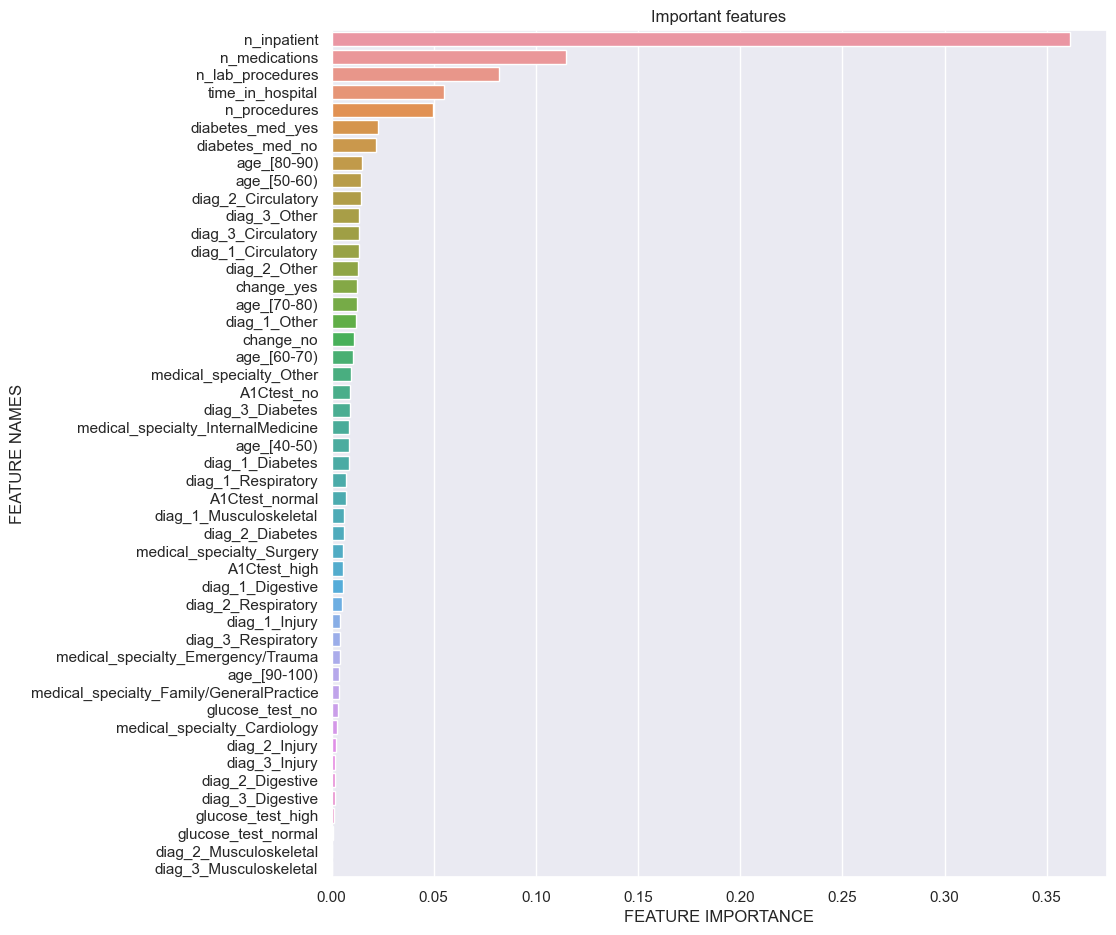

In [103]:
plot_feature_importance(forest.feature_importances_, X.columns)

Number of inpatient procedures is the main predictor followed by n_medications, n_lab_procedures, time_in_hospital, n_procedures, whether diabetes meds were recommended or not, and finally age 80-90 and 50-60.

# Conclusion
The doctors should focus on the patients that have high number of inpatient visits to the hospital in the year before the hospital visit, followed by those offer many medications, many lab procedures performed on them, spent many days in hospital, had many number of procedures performed on them. They can achieve an accuracy rate of 61%.
